# Assignment 1 - Creating and Manipulating Graphs

Eight employees at a small company were asked to choose 3 movies that they would most enjoy watching for the upcoming company movie night. These choices are stored in the file `assets/Employee_Movie_Choices.txt`.

A second file, `assets/Employee_Relationships.txt`, has data on the relationships between different coworkers. 

The relationship score has value of `-100` (Enemies) to `+100` (Best Friends). A value of zero means the two employees haven't interacted or are indifferent.

Both files are tab delimited.

In [4]:
import networkx as nx
import pandas as pd
import numpy as np


# This is the set of employees
employees = set(['Pablo',
                 'Lee',
                 'Georgia',
                 'Vincent',
                 'Andy',
                 'Frida',
                 'Joan',
                 'Claude'])

# This is the set of movies
movies = set(['The Shawshank Redemption',
              'Forrest Gump',
              'The Matrix',
              'Anaconda',
              'The Social Network',
              'The Godfather',
              'Monty Python and the Holy Grail',
              'Snakes on a Plane',
              'Kung Fu Panda',
              'The Dark Knight',
              'Mean Girls'])


# you can use the following function to plot graphs
# make sure to comment it out before submitting to the autograder
def plot_graph(G, weight_name=None):
    '''
    G: a networkx G
    weight_name: name of the attribute for plotting edge weights (if G is weighted)
    '''
    #%matplotlib notebook
    import matplotlib.pyplot as plt
    
    plt.figure()
    pos = nx.spring_layout(G)
    edges = G.edges()
    weights = None
    
    if weight_name:
        weights = [int(G[u][v][weight_name]) for u,v in edges]
        labels = nx.get_edge_attributes(G,weight_name)
        nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
        nx.draw_networkx(G, pos, width=weights);
    else:
        nx.draw_networkx(G, pos,);

### Question 1

Using NetworkX, load in the bipartite graph from `assets/Employee_Movie_Choices.txt` and return that graph.

*This function should return a bipartite networkx graph with 19 nodes and 24 edges*

In [7]:
def answer_one():
    
    employee_movie_df = pd.read_csv('assets/Employee_Movie_Choices.txt', delimiter='\t', header=None, names=['Employee', 'Movie'])
    
    # Create a new graph
    B = nx.Graph()
    
    # Add nodes with the employee label, ensure only those from the set are added
    for employee in employee_movie_df['Employee'].unique():
        if employee in employees:
            B.add_node(employee, type='employee')
    
    # Add nodes with the movie label, ensure only those from the set are added
    for movie in employee_movie_df['Movie'].unique():
        if movie in movies:
            B.add_node(movie, type='movie')
    
    # Add edges from the employee-movie dataframe, check if both nodes exist
    for _, row in employee_movie_df.iterrows():
        if row['Employee'] in employees and row['Movie'] in movies:
            B.add_edge(row['Employee'], row['Movie'])
    
    return B

# Test the revised function
G = answer_one()
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())


Number of nodes: 19
Number of edges: 24


In [ ]:
assert type(answer_one()) == nx.Graph , "Your return type should be a Graph object"



### Question 2

Using the graph from the previous question, add nodes attributes named `'type'` where movies have the value `'movie'` and employees have the value `'employee'` and return that graph.

*This function should return a bipartite networkx graph with node attributes `{'type': 'movie'}` or `{'type': 'employee'}`*

In [8]:
def answer_two():
    # Reuse the graph creation from answer_one
    B = answer_one()

    # Ensure all nodes have the correct type attribute
    for node in B.nodes(data=True):
        if node[0] in employees:
            B.nodes[node[0]]['type'] = 'employee'
        elif node[0] in movies:
            B.nodes[node[0]]['type'] = 'movie'
    
    return B

# Test the function
G = answer_two()
print("Node types check:")
print(nx.get_node_attributes(G, 'type'))  # This will print out the type attributes of all nodes


Node types check:
{'Andy': 'employee', 'Claude': 'employee', 'Frida': 'employee', 'Georgia': 'employee', 'Joan': 'employee', 'Lee': 'employee', 'Pablo': 'employee', 'Vincent': 'employee', 'Anaconda': 'movie', 'Mean Girls': 'movie', 'The Matrix': 'movie', 'Monty Python and the Holy Grail': 'movie', 'Snakes on a Plane': 'movie', 'The Shawshank Redemption': 'movie', 'The Social Network': 'movie', 'Forrest Gump': 'movie', 'Kung Fu Panda': 'movie', 'The Dark Knight': 'movie', 'The Godfather': 'movie'}


In [ ]:
assert type(answer_two()) == nx.Graph , "Your return type should be a Graph object"


### Question 3

Find a weighted projection of the graph from `answer_two` which tells us how many movies different pairs of employees have in common.

*This function should return a weighted projected graph.*

In [9]:
def answer_three():
    # Reuse the graph from answer_two
    B = answer_two()

    # Project the graph on the 'employee' node set
    weighted_projected_graph = nx.bipartite.weighted_projected_graph(B, employees)
    
    return weighted_projected_graph


G = answer_three()
print("Weighted edges between employees:")
print(G.edges(data=True))  # This will print out the edges with weights indicating shared movies


Weighted edges between employees:
[('Pablo', 'Andy', {'weight': 1}), ('Pablo', 'Vincent', {'weight': 1}), ('Pablo', 'Frida', {'weight': 2}), ('Claude', 'Andy', {'weight': 1}), ('Claude', 'Georgia', {'weight': 3}), ('Vincent', 'Frida', {'weight': 2}), ('Frida', 'Andy', {'weight': 1}), ('Joan', 'Andy', {'weight': 1}), ('Joan', 'Lee', {'weight': 3}), ('Andy', 'Lee', {'weight': 1}), ('Andy', 'Georgia', {'weight': 1})]


EdgeDataView([('Pablo', 'Andy', {'weight': 1}), ('Pablo', 'Vincent', {'weight': 1}), ('Pablo', 'Frida', {'weight': 2}), ('Claude', 'Andy', {'weight': 1}), ('Claude', 'Georgia', {'weight': 3}), ('Vincent', 'Frida', {'weight': 2}), ('Frida', 'Andy', {'weight': 1}), ('Joan', 'Andy', {'weight': 1}), ('Joan', 'Lee', {'weight': 3}), ('Andy', 'Lee', {'weight': 1}), ('Andy', 'Georgia', {'weight': 1})])

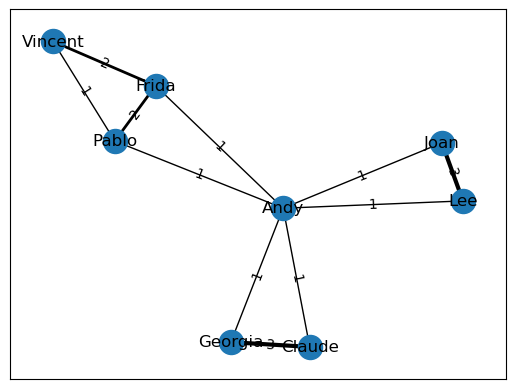

In [10]:
G = answer_three()
plot_graph(G, weight_name="weight")
G.edges(data = True)

In [ ]:
assert type(answer_three()) == nx.Graph , "Your return type should be a Graph object"


### Question 4

Suppose you'd like to find out if people that have a high relationship score also like the same types of movies.

Find the pearson correlation between employee relationship scores and the number of movies they have in common. If two employees have no movies in common it should be treated as a 0, not a missing value, and should be included in the correlation calculation.

*This function should return a float.*

In [16]:
from scipy.stats import pearsonr

def answer_four():
    # Load the relationship data
    relationships_df = pd.read_csv('assets/Employee_Relationships.txt', delimiter='\t', header=None, names=['Employee1', 'Employee2', 'Relationship'])

    # Get the graph of common movies
    G = answer_three()

    # Create a DataFrame from the graph of shared movies
    movies_shared_df = pd.DataFrame(G.edges(data=True), columns=['Employee1', 'Employee2', 'data'])
    movies_shared_df['Shared_Movies'] = movies_shared_df['data'].map(lambda x: x['weight'])
    movies_shared_df.drop(columns='data', inplace=True)

    # We need to consider both directions of relationships
    # Duplicate the movie shared data to account for both (Employee1, Employee2) and (Employee2, Employee1)
    movies_shared_df_rev = movies_shared_df.rename(columns={"Employee1": "Employee2", "Employee2": "Employee1"})
    movies_shared_complete = pd.concat([movies_shared_df, movies_shared_df_rev], ignore_index=True)

    # Merge the relationship scores with the shared movies data
    combined_df = pd.merge(relationships_df, movies_shared_complete, on=['Employee1', 'Employee2'], how='left')
    combined_df['Shared_Movies'].fillna(0, inplace=True)  # Replace NaN with 0 for pairs that have no movies in common

    # Calculate the Pearson correlation
    correlation, _ = pearsonr(combined_df['Relationship'], combined_df['Shared_Movies'])

    return correlation

# Test the function
correlation_score = answer_four()
print("Pearson correlation:", correlation_score)


Pearson correlation: 0.7883962221733475


In [12]:
ans_four = answer_four()